# Aufgabe 1: Conversion of Wind Speeds to Power Output of a Wind Turbine

### a ) 

In [ ]:
import pandas as pd
import numpy as np

### b) read the csv file

In [315]:
fn = "https://tubcloud.tu-berlin.de/s/DbDZ7KCtoRAFpyS/download/wind-speeds.csv"
df = pd.read_csv(fn, index_col = 0, sep =",")
df.columns = ['windspeed']

### c) convert wind speed using power law

In [316]:
z = 80   #meters
z_r = 10    #meters
alpha = 1/7
factor = (z/z_r)**alpha
#multiply column with factor from power law function
df['corrected_windspeed'] = df.windspeed*factor
df.iloc[:10,:50]

,windspeed,corrected_windspeed
time,,
2019-01-01 00:00:00,7.885,10.612423
2019-01-01 01:00:00,8.786,11.825079
2019-01-01 02:00:00,9.390,12.638003
2019-01-01 03:00:00,9.768,13.146753
2019-01-01 04:00:00,10.317,13.885652
2019-01-01 05:00:00,10.670,14.360755
2019-01-01 06:00:00,10.918,14.694538
2019-01-01 07:00:00,11.176,15.041781
2019-01-01 08:00:00,11.416,15.364797


### d) function with windspeed as argument, converting windspeed to power output for each turbine create dictionary for DataFrame:

In [317]:
def Power_Vestas(speed):
    data_Vestas = {'windspeed_low': [0, 4, 6,8,10,12,14,16],
    'windspeed_up': [4,6,8,10,12,14,16,25],
    'Vestas_Output': [0,0.2,0.5,1.4,2.6,3,3,3]}
    Vestas = pd.DataFrame(data_Vestas, index = [np.linspace(1,8,8)])
    Vestas.columns=['Windspeed_low','Windspeed_up','Power']
    power = Vestas.loc[(Vestas.Windspeed_up >= speed) & (Vestas['Windspeed_low'] <= speed)].Power
    return(power)

def Power_Enercon(speed):
    data_Enercon = {'windspeed_low': [0, 4, 6,8,10,12,14,16],
    'windspeed_up': [4,6,8,10,12,14,16,25],
    'Vestas_Output': [0,0.1,0.3,0.8,1.6,2.2,2.7,3]}
    Enercon = pd.DataFrame(data_Enercon, index = [np.linspace(1,8,8)])
    Enercon.columns=['Windspeed_low','Windspeed_up','Power']
    power = Enercon.loc[(Enercon.Windspeed_up >= speed) & (Enercon['Windspeed_low'] <= speed)].Power
    return(power)

In [318]:
#use this function to convert from wind speeds to power production for the full year for each of the two turbine types.
def createList(n):
    lst = []
    for i in range(n):
        lst.append(i)
    return(lst)

index = 0
#create empty list:
Liste = createList(len(df))

#calculate power production and set values to list (Vestas)
for i in Liste:
    Liste[index] = Power_Vestas(df.corrected_windspeed[index]).item()
    index=index+1
#add power production to list
df['Power_Vestas'] = Liste

index = 0
#calculate power production and set values to list (Enercon)
for i in Liste:
    Liste[index] = Power_Enercon(df.corrected_windspeed[index]).item()
    index=index+1
#add power production to list
df['Power_Enercon'] = Liste
#check if correct:
df.iloc[:10,:50]

,windspeed,corrected_windspeed,Power_Vestas,Power_Enercon
time,,,,
2019-01-01 00:00:00,7.885,10.612423,2.6,1.6
2019-01-01 01:00:00,8.786,11.825079,2.6,1.6
2019-01-01 02:00:00,9.390,12.638003,3.0,2.2
2019-01-01 03:00:00,9.768,13.146753,3.0,2.2
2019-01-01 04:00:00,10.317,13.885652,3.0,2.2
2019-01-01 05:00:00,10.670,14.360755,3.0,2.7
2019-01-01 06:00:00,10.918,14.694538,3.0,2.7
2019-01-01 07:00:00,11.176,15.041781,3.0,2.7
2019-01-01 08:00:00,11.416,15.364797,3.0,2.7


### f) Which wind turbine would yield the most electrical energy in the year? By what margin? Power production of Vestas and Enercon added up:

In [319]:
PP_Vestas = df.Power_Vestas.sum()
PP_Enercon = df.Power_Enercon.sum()

if PP_Vestas < PP_Enercon:
    answer= 'the Enercon turbine would have the bigger electric yield in the year'
    print(answer) 
    print(PP_Vestas)
elif PP_Vestas > PP_Enercon:
    answer= 'the Vestas turbine would have the bigger electric yield in the year with ' + str(PP_Vestas) + ' MWh, the produced electric yield of Enercon is ' + str(PP_Enercon) + ' MWh' 
    print(answer)
else:
    answer= 'the turbines have the same electric yield in the year'
    print(answer)
    
# Vestas output used for all further calculations.

the Vestas turbine would have the bigger electric yield in the year with 10169.199999999999 MWh, the produced electric yield of Enercon is 6351.4000000000015 MWh


### g) Normalise the power output time series by the turbine’s rated capacity. 

In [320]:
Nominal_Rating = 3 #MW
Normalised_Power = df.Power_Vestas/Nominal_Rating
df['Normalised_Production'] = Normalised_Power
df.iloc[:10,:50]

,windspeed,corrected_windspeed,Power_Vestas,Power_Enercon,Normalised_Production
time,,,,,
2019-01-01 00:00:00,7.885,10.612423,2.6,1.6,0.866667
2019-01-01 01:00:00,8.786,11.825079,2.6,1.6,0.866667
2019-01-01 02:00:00,9.390,12.638003,3.0,2.2,1.000000
2019-01-01 03:00:00,9.768,13.146753,3.0,2.2,1.000000
2019-01-01 04:00:00,10.317,13.885652,3.0,2.2,1.000000
2019-01-01 05:00:00,10.670,14.360755,3.0,2.7,1.000000
2019-01-01 06:00:00,10.918,14.694538,3.0,2.7,1.000000
2019-01-01 07:00:00,11.176,15.041781,3.0,2.7,1.000000
2019-01-01 08:00:00,11.416,15.364797,3.0,2.7,1.000000


### h) What is the annual average capacity factor of the wind turbine?

In [321]:
capacity_factor = df.Normalised_Production.mean()
print(capacity_factor)

0.3869558599695586


### i) What share of time does the wind turbine produce nothing?

In [322]:
zero_count = df['Power_Vestas'].value_counts()[0]
print('the wind turbine produces ' + str(zero_count) + ' times nothing.')


the wind turbine produces 283 times nothing.


### j) What share of time does the wind turbine produce at rated capacity?


In [323]:
ratedcapacity_count = df['Normalised_Production'].value_counts()[1]
print('the wind turbine produces ' + str(ratedcapacity_count) + ' at rated capacity')

the wind turbine produces 561 at rated capacity


### k) Does the wind turbine ever shut down because of too high wind speeds? 

In [324]:
toohighwindspeeds =df[df['corrected_windspeed'] >=25].value_counts().shape[0]
if toohighwindspeeds == 0:
    print('No, the turbine never shuts down because of too high windspeeds.')
else:
    print('Yes, the turbine shuts down ' + str(toohighwindspeeds)+ ' times because of too high windspeeds.')

No, the turbine never shuts down because of too high windspeeds.


### l) Plot the capacity factor time series for the full year using matplotlib. Include axis labels!

Text(0.5, 1.0, 'Capacity Factor over Time')

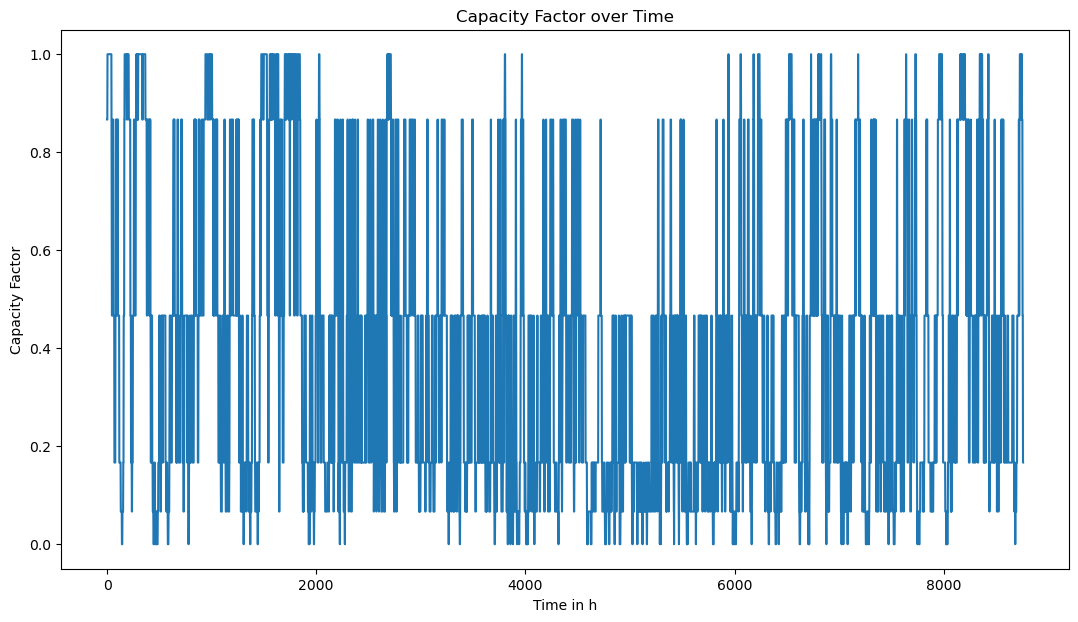

In [325]:
from matplotlib import pyplot as plt
x_ax = np.linspace(1,len(df.Normalised_Production),len(df.Normalised_Production))
fig, ax = plt.subplots(figsize=(13,7))
ax.plot(x_ax,Normalised_Power)
ax.set_xlabel('Time in h')
ax.set_ylabel('Capacity Factor')
ax.set_title('Capacity Factor over Time')

# Aufgabe 2

In [326]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#read the csv file
fn2 = "https://tubcloud.tu-berlin.de/s/nwCrNLrtL6LAN3W/download/time-series-lecture-2.csv"
df2 = pd.read_csv(fn2, index_col = 0, parse_dates = True)
df2.iloc[:10,:50]

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh]
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0000,NaN
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0000,NaN
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0000,NaN
2015-01-01 03:00:00,38.765,0.1745,0.6803,0.0000,NaN
2015-01-01 04:00:00,38.941,0.1826,0.7272,0.0000,NaN
2015-01-01 05:00:00,39.045,0.1869,0.7490,0.0000,NaN
2015-01-01 06:00:00,40.206,0.1999,0.7706,0.0000,NaN
2015-01-01 07:00:00,41.133,0.2120,0.8010,0.0003,NaN
2015-01-01 08:00:00,42.963,0.2281,0.7828,0.0442,NaN
2015-01-01 09:00:00,45.088,0.2452,0.7865,0.1263,NaN


### a) What are the average, minimum and maximum values?



In [327]:
averages = df2.mean()
maximum = df2.max()
minimum = df2.min()
print('averages:', averages, 'maximum', maximum, 'minimum', minimum)


averages: load [GW]         54.736992
onwind [pu]        0.205556
offwind [pu]       0.362993
solar [pu]         0.122621
prices [€/MWh]    31.835717
dtype: float64 maximum load [GW]         75.8170
onwind [pu]        0.9659
offwind [pu]       0.9856
solar [pu]         0.8134
prices [€/MWh]    99.7700
dtype: float64 minimum load [GW]         32.4180
onwind [pu]        0.0007
offwind [pu]       0.0000
solar [pu]         0.0000
prices [€/MWh]   -79.9400
dtype: float64


### b) Find the timestamps where data on prices is missing. 

In [328]:
df3 = df2.loc[df2['prices [€/MWh]'].isnull()] 
df3

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh]
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN
2015-01-01 03:00:00,38.765,0.1745,0.6803,0.0,NaN
2015-01-01 04:00:00,38.941,0.1826,0.7272,0.0,NaN
...,...,...,...,...,...
2015-01-04 20:00:00,48.877,0.2732,0.4905,0.0,NaN
2015-01-04 21:00:00,48.808,0.2536,0.5374,0.0,NaN
2015-01-04 22:00:00,46.024,0.2400,0.5724,0.0,NaN
2015-01-04 23:00:00,42.658,0.2387,0.5799,0.0,NaN


### c) Fill up the missing data with the prices observed one week ahead in the DataFrame. I.e. for missing data on 1 January 12:00, look for the values on 8 January 12:00.

In [329]:
for i in range(0, len(df2)):
    if np.isnan(df2['prices [€/MWh]'][i]) == True:
        df2['prices [€/MWh]'][i] = df2['prices [€/MWh]'][i-168] 
df2

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh]
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,0.01
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,-0.96
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,0.02
2015-01-01 03:00:00,38.765,0.1745,0.6803,0.0,0.09
2015-01-01 04:00:00,38.941,0.1826,0.7272,0.0,3.27
...,...,...,...,...,...
2015-12-31 19:00:00,47.719,0.1388,0.4434,0.0,36.79
2015-12-31 20:00:00,45.911,0.1211,0.4023,0.0,28.81
2015-12-31 21:00:00,45.611,0.1082,0.4171,0.0,26.27
2015-12-31 22:00:00,43.762,0.1026,0.4716,0.0,29.99


### d) Plot the time series for the full year.

Text(0.5, 1.0, 'Solar over Time')

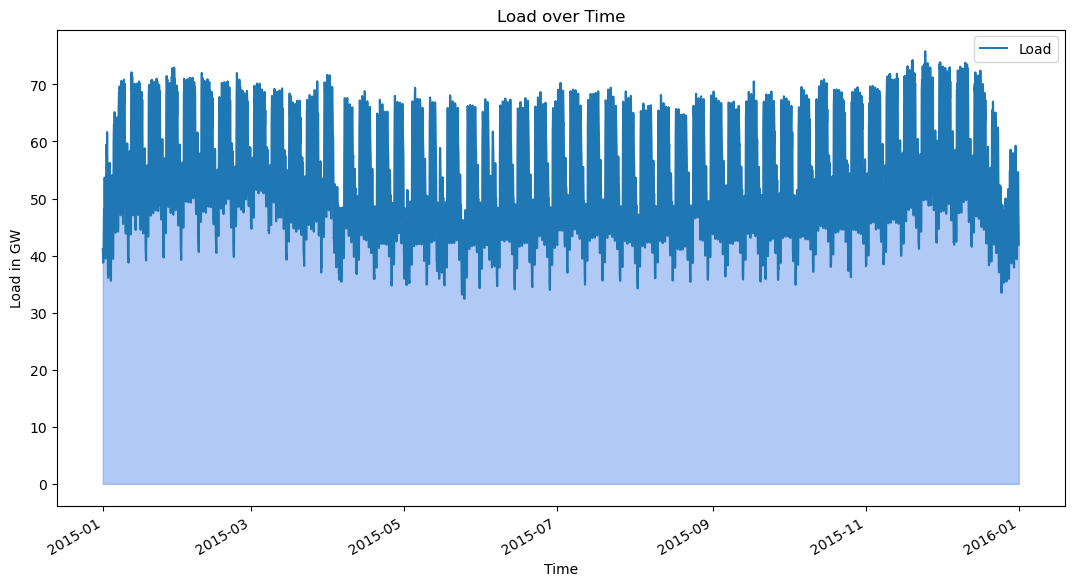

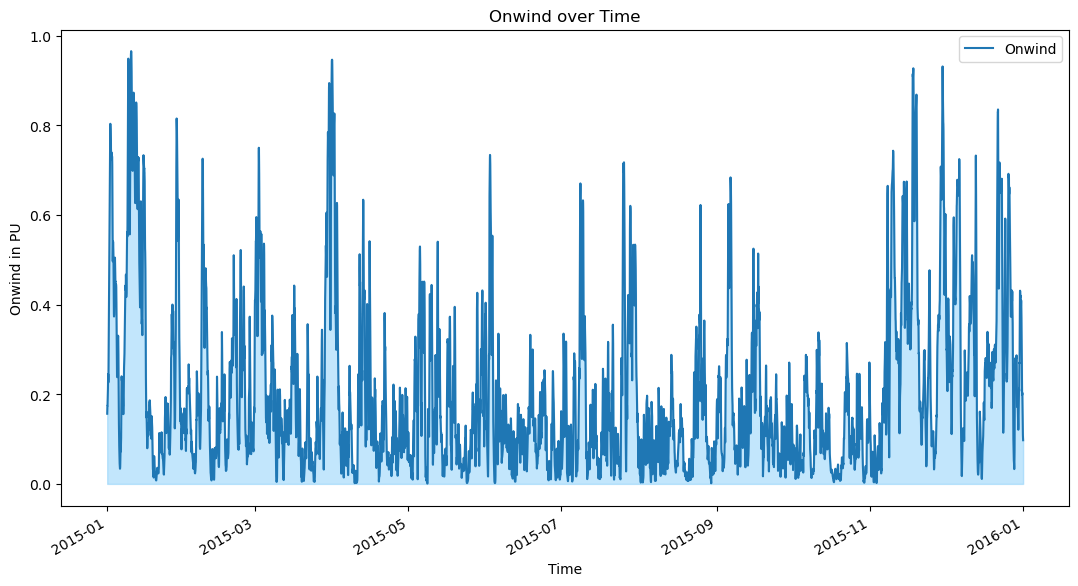

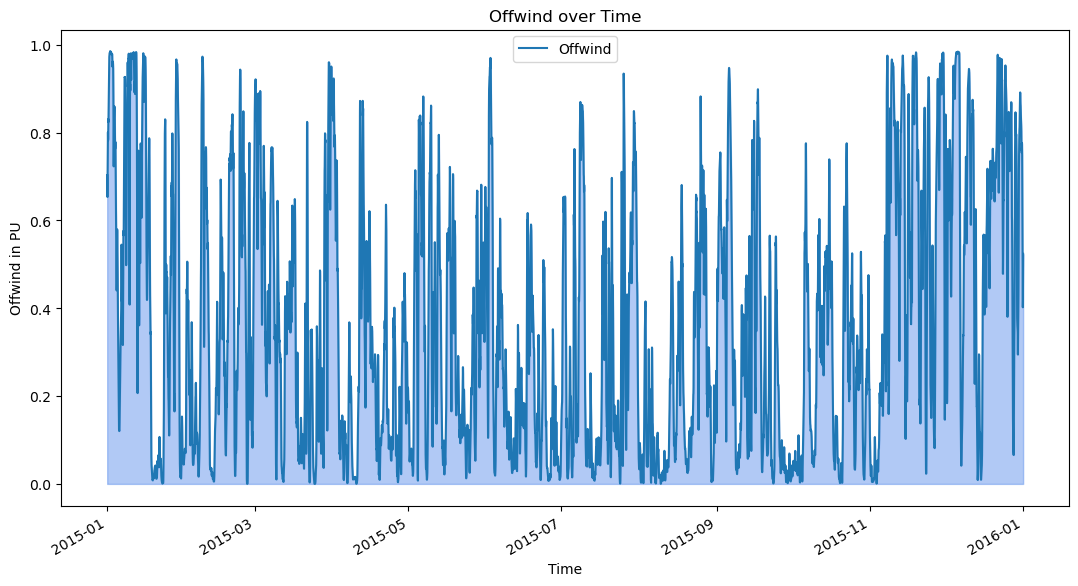

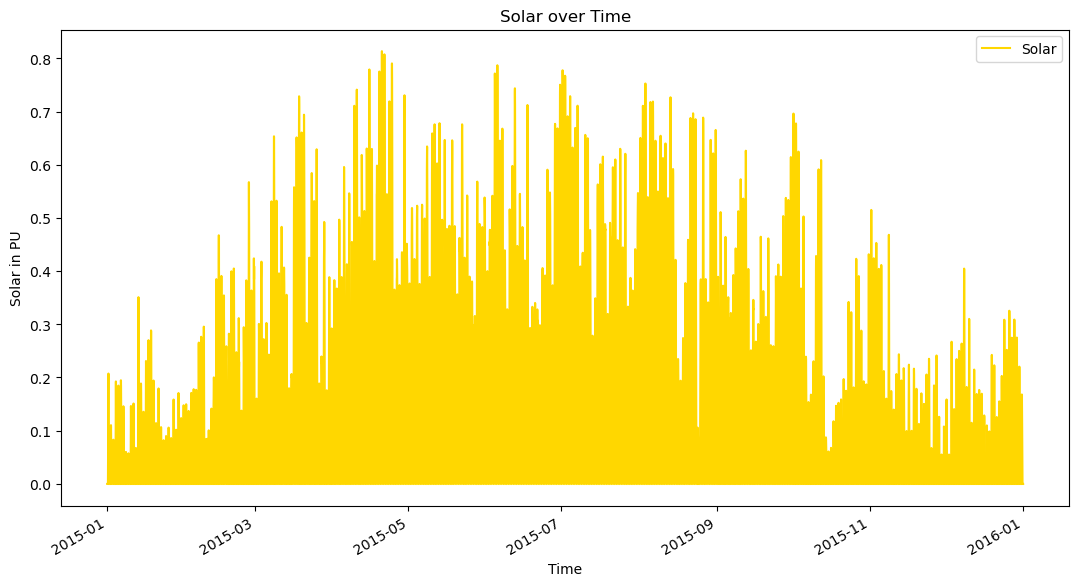

In [330]:
load = df2['load [GW]']
onwind = df2['onwind [pu]']
offwind = df2['offwind [pu]']
solar = df2['solar [pu]']
prices = df2['prices [€/MWh]']

#load
fig, ax = plt.subplots(figsize=(13,7))
ax.plot(df2.index, load, label="Load")
plt.fill_between(
    x = df2.index,
    y1 = load,
        color= "cornflowerblue",
        alpha= 0.5)
fig.autofmt_xdate()
ax.legend(loc=0)
ax.set_xlabel('Time')
ax.set_ylabel('Load in GW')
ax.set_title('Load over Time')

#onwind
fig, ax = plt.subplots(figsize=(13,7))
ax.plot(df2.index, onwind, label="Onwind")
plt.fill_between(
    x = df2.index,
    y1 = onwind,
        color= "lightskyblue",
        alpha= 0.5)
fig.autofmt_xdate()
ax.legend(loc=0)
ax.set_xlabel('Time')
ax.set_ylabel('Onwind in PU')
ax.set_title('Onwind over Time')

#offwind

fig, ax = plt.subplots(figsize=(13,7))
ax.plot(df2.index, offwind, label="Offwind")
plt.fill_between(
    x = df2.index,
    y1 = offwind,
        color= "cornflowerblue",
        alpha= 0.5)
fig.autofmt_xdate()
ax.legend(loc=0)
ax.set_xlabel('Time')
ax.set_ylabel('Offwind in PU')
ax.set_title('Offwind over Time')

#solar

fig, ax = plt.subplots(figsize=(13,7))
ax.plot(df2.index, solar, label="Solar", color="gold")
plt.fill_between(
    x = df2.index,
    y1 = solar,
        color= "yellow",
        alpha= 0.3)
fig.autofmt_xdate()
ax.legend(loc=0)
ax.set_xlabel('Time')
ax.set_ylabel('Solar in PU')
ax.set_title('Solar over Time')



### e)  Plot the time series for the month May. 

Text(0.5, 1.0, 'Onwind over Time')

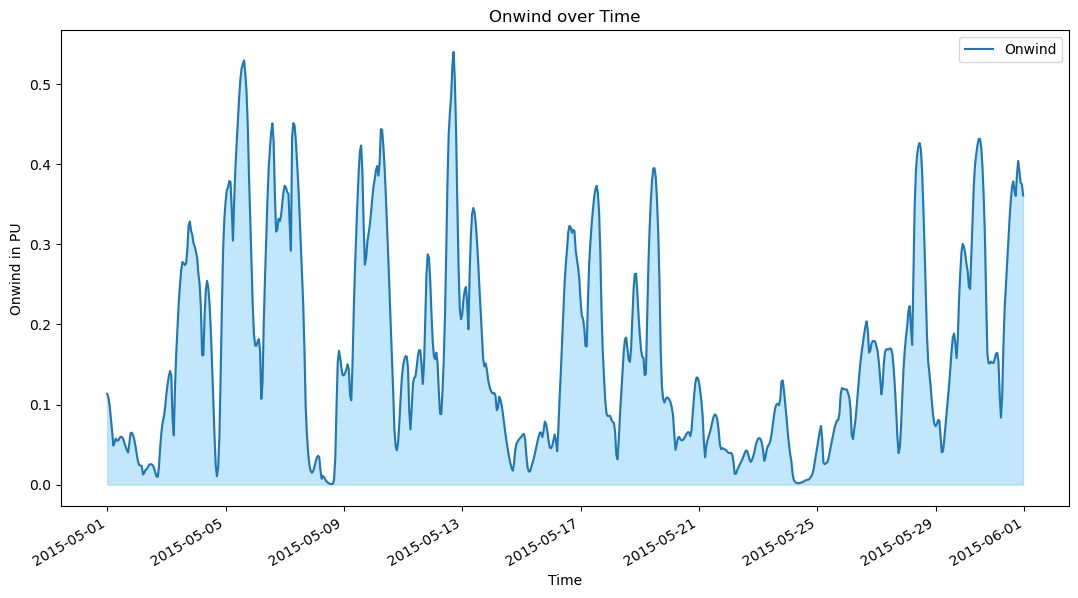

In [331]:
df4= df2.loc['2015-05']
load = df4['load [GW]']
onwind = df4['onwind [pu]']
offwind = df4['offwind [pu]']
solar = df4['solar [pu]']
prices = df4['prices [€/MWh]']
fig, ax = plt.subplots(figsize=(13,7))
ax.plot(df4.index, onwind, label="Onwind")
plt.fill_between(
    x = df4.index,
    y1 = onwind,
        color= "lightskyblue",
        alpha= 0.5)
fig.autofmt_xdate()
ax.legend(loc=0)
ax.set_xlabel('Time')
ax.set_ylabel('Onwind in PU')
ax.set_title('Onwind over Time')

Text(0.5, 1.0, 'Load and Prices')

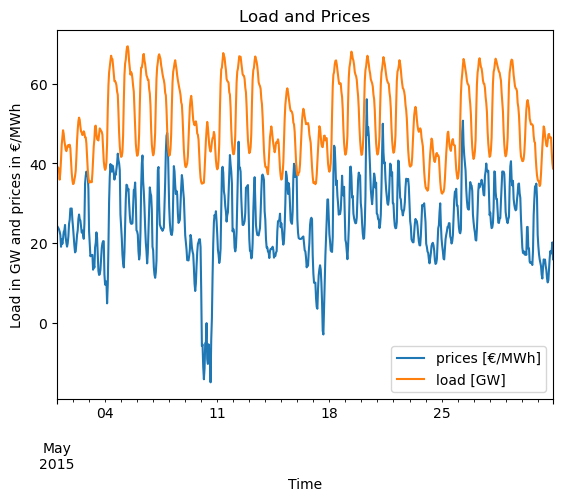

In [332]:
ax = df2['prices [€/MWh]'].loc['2015-05'].plot()
ax = df2['load [GW]'].loc['2015-05'].plot()

plt.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Load in GW and prices in €/MWh')
ax.set_title('Load and Prices')

Text(0.5, 1.0, 'Solar, onwind and offwind')

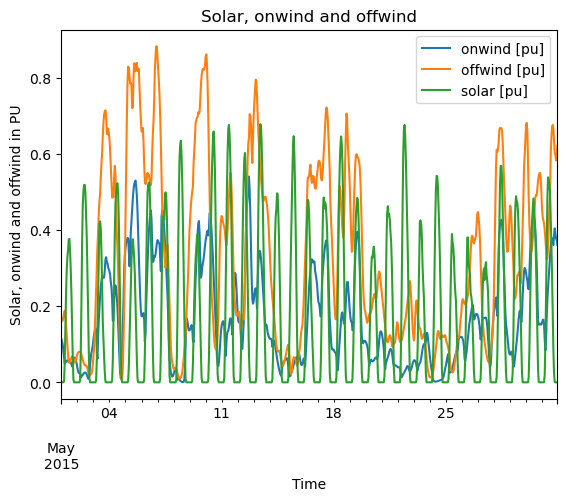

In [333]:
ax = df2['onwind [pu]'].loc['2015-05'].plot()
ax = df2['offwind [pu]'].loc['2015-05'].plot()
ax = df2['solar [pu]'].loc['2015-05'].plot()

plt.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Solar, onwind and offwind in PU')
ax.set_title('Solar, onwind and offwind')

### Resample the time series to daily, weelky, and monthly frequencies and create a plot that contains the variously resampled time series in one figure.

Text(0.5, 1.0, 'Resampled prices in €/MWh')

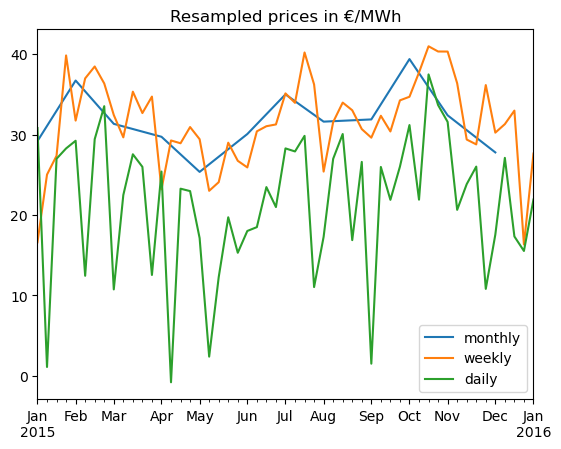

In [334]:
df2['prices [€/MWh]'].resample("M").mean().plot()
df2['prices [€/MWh]'].resample("W").mean().plot()
df2['prices [€/MWh]'].resample("D").mean().plot()
plt.legend(['monthly','weekly','daily'])
plt.title('Resampled prices in €/MWh')

In [ ]:
df2['onwind [pu]'].resample("M").mean().plot(color = "b")
df2['onwind [pu]'].resample("W").mean().plot(color = "b", alpha = 0.7)
df2['onwind [pu]'].resample("D").mean().plot(color = "b", alpha = 0.4)

df2['offwind [pu]'].resample("M").mean().plot(color = "g")
df2['offwind [pu]'].resample("W").mean().plot(color ="g", alpha = 0.7)
df2['offwind [pu]'].resample("D").mean().plot(color = "g", alpha = 0.4)

df2['solar [pu]'].resample("M").mean().plot(color = "gold")
df2['solar [pu]'].resample("W").mean().plot(color = "gold", alpha = 0.7)
df2['solar [pu]'].resample("D").mean().plot(color = "gold", alpha = 0.4)
plt.legend(['onwind', , ,'offwind', , , 'solar'])
plt.title('Resampled onwind, offwind and solar in pu')

#Legende müsste angepasst werden

### g) Sort the values in descending order and plot the duration curve. Hint: Run  .reset_index(drop=True) to drop the index after sorting.

Text(0, 0.5, 'solar in GW')

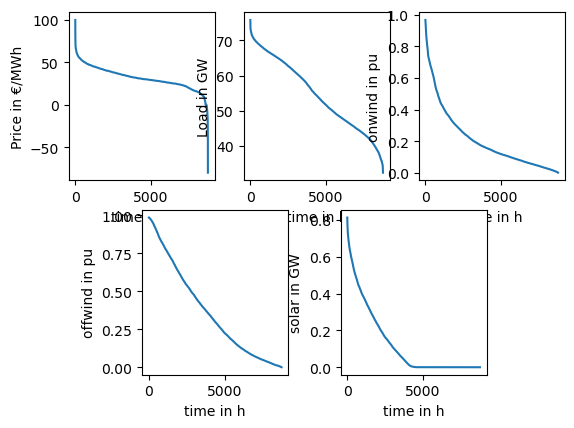

In [336]:
fig, ax = plt.subplots(2,3)
ax[1][2].set_visible(False)
ax[1][0].set_position([0.24,0.125,0.228,0.343])
ax[1][1].set_position([0.55,0.125,0.228,0.343])

df_desc_p = df2.sort_values('prices [€/MWh]', ascending=False).reset_index(drop=True)
ax[0,0].plot(df_desc_p['prices [€/MWh]'])
plt.title('durtion curve prices')
ax[0,0].set_xlabel('time in h')
ax[0,0].set_ylabel('Price in €/MWh')


df_desc_l = df2.sort_values('load [GW]', ascending=False).reset_index(drop=True)
ax[0,1].plot(df_desc_l['load [GW]'])
plt.title('durtion curve load')
ax[0,1].set_xlabel('time in h')
ax[0,1].set_ylabel('Load in GW')

df_desc_on = df2.sort_values('onwind [pu]', ascending=False).reset_index(drop=True)
ax[0,2].plot(df_desc_on['onwind [pu]'])
plt.title('durtion curve onwind')
ax[0,2].set_xlabel('time in h')
ax[0,2].set_ylabel('onwind in pu')

df_desc_off = df2.sort_values('offwind [pu]', ascending=False).reset_index(drop=True)
ax[1,0].plot(df_desc_off['offwind [pu]'])
plt.title('durtion curve offwind')
ax[1,0].set_xlabel('time in h')
ax[1,0].set_ylabel('offwind in pu')

df_desc_s = df2.sort_values('solar [pu]', ascending=False).reset_index(drop=True)
ax[1,1].plot(df_desc_s['solar [pu]'])
plt.title('durtion curve solar')
ax[1,1].set_xlabel('time in h')
ax[1,1].set_ylabel('solar in GW')

### h) Plot a histogram of the time series values. Use at least 20 bins.

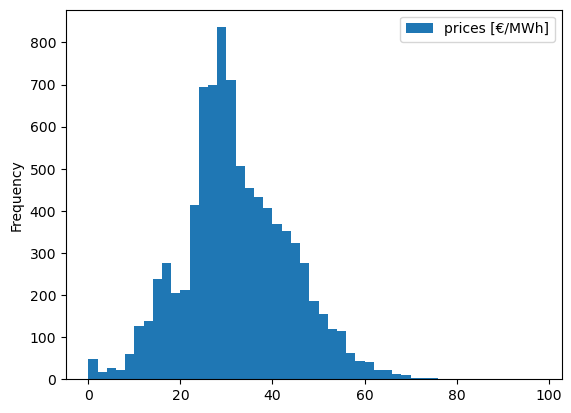

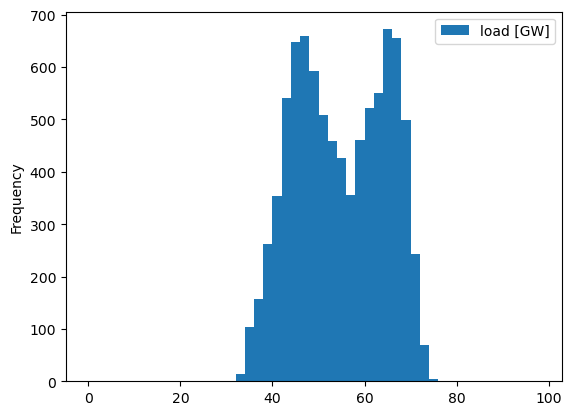

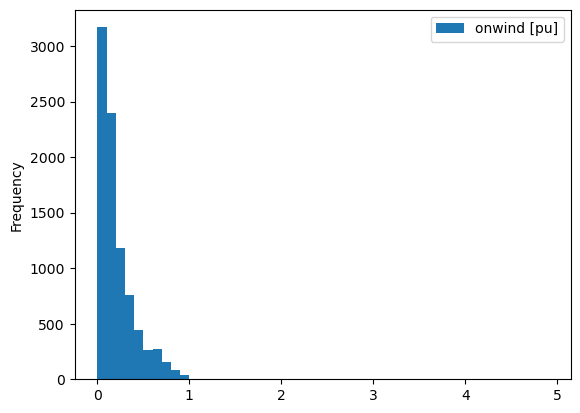

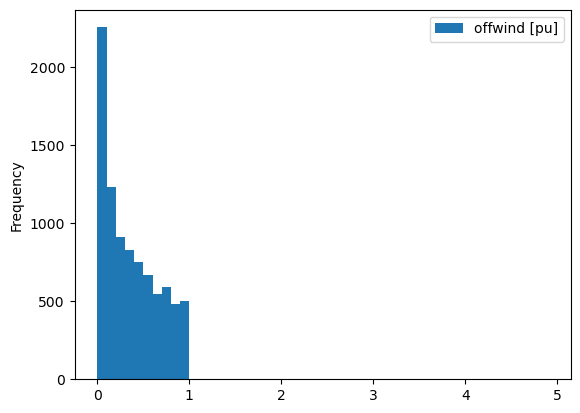

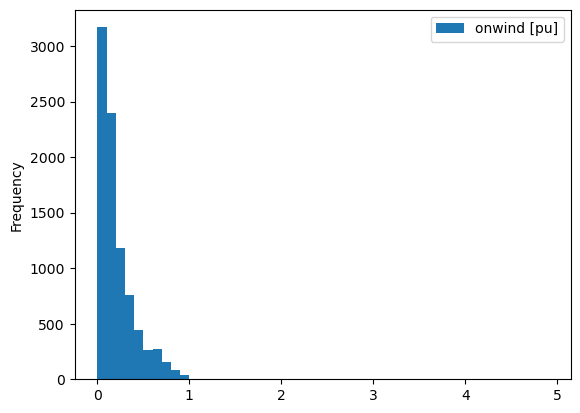

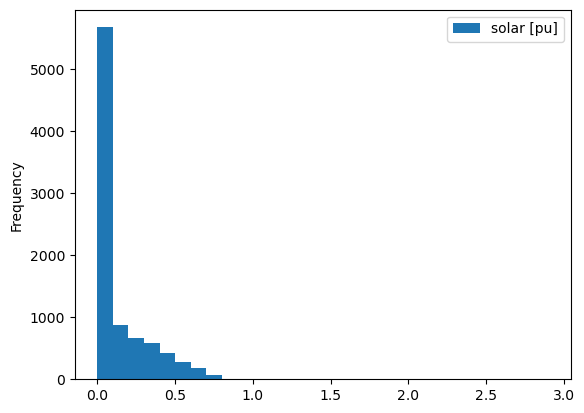

In [337]:
df2['prices [€/MWh]'].plot.hist(bins=np.arange(0,100,2))
plt.legend()

plt.figure()
df2['load [GW]'].plot.hist(bins=np.arange(0,100,2))
plt.legend()

plt.figure()
df2['onwind [pu]'].plot.hist(bins=np.arange(0,5,0.1))
plt.legend()

plt.figure()
df2['offwind [pu]'].plot.hist(bins=np.arange(0,5,0.1))
plt.legend()

plt.figure()
df2['onwind [pu]'].plot.hist(bins=np.arange(0,5,0.1))
plt.legend()

plt.figure()
df2['solar [pu]'].plot.hist(bins=np.arange(0,3,0.1))
plt.legend()


# Aufgabe 3: European Industrial Sites

In [338]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

Solving environment: ...working... done

# All requested packages already installed.

^C


### a) Read the CSV file as DataFrame. The separator in this dataset is a semicolon (“;”). Use the first column as the index column

In [350]:
df3 = pd.read_csv("https://tubcloud.tu-berlin.de/s/JamLFf2Pjc6KHfp/download/Industrial_Database.csv", index_col = 'SiteID', sep = ";")
df3

<bound method NDFrame.tail of         Unnamed: 0                      CompanyName  \
SiteID                                                
1                0                   voestalpine AG   
2                1                   voestalpine AG   
3                2          Schmid Industrieholding   
4                3  OMV Refining and Marketing GmbH   
5                4         Zementwerk Hatschek GmbH   
...            ...                              ...   
5025          5024                   SLOVNAFT, a.s.   
5026          5025             IPEĽSKÉ TEHELNE a.s.   
5027          5026             IPEĽSKÉ TEHELNE a.s.   
5028          5027         VETROPACK NEMŠOVÁ s.r.o.   
5029          5028             Calmit, spol. s r.o.   

                                      SiteName  \
SiteID                                           
1            voestalpine Stahl Donawitz GesmbH   
2                       voestalpine Stahl GmbH   
3                  Wopfinger Baustoffindustrie   
4   

### b) Built GeoDataFrame and set the column “SiteID” as its index.

In [340]:
import geopandas as gpd
import cartopy
from shapely import wkt

indizes_neu= df3.geom.dropna()
indizes_neu = indizes_neu.index

data = gpd.GeoSeries.from_wkt(df3.geom.dropna().values, crs=4326)
#print(data.dtypes)

gdf = gpd.GeoDataFrame(df3, geometry=data, crs=4326, index = indizes_neu)
gdf

,Unnamed: 0,CompanyName,SiteName,Address,CityCode,City,Country,geom,Subsector,DataSource,Emissions_ETS_2014,Emissions_EPRTR_2014,Production,Fuel_Demand,Excess_Heat_100-200C,Excess_Heat_200-500C,Excess_Heat_500C,Excess_Heat_Total,geometry
SiteID,,,,,,,,,,,,,,,,,,,
1,0,voestalpine AG,voestalpine Stahl Donawitz GesmbH,Kerpelystrasse 199,8700,Leoben,Austria,POINT(15.067806 47.03378),Iron and steel,ETS/EPRTR,2808536.0,2810000.0,2726675.56,6346.15,192.34,173.66,0.00,366.01,POINT (14.34306 48.28194)
2,1,voestalpine AG,voestalpine Stahl GmbH,voestalpine-Strasse 3,4020,Linz,Austria,POINT(14.343056 48.281944),Iron and steel,ETS/EPRTR,8698426.0,8660000.0,8444892.86,19732.48,595.71,330.48,40.16,966.36,POINT (16.08592 47.87225)
3,2,Schmid Industrieholding,Wopfinger Baustoffindustrie,Wopfing 156,2754,Waldegg,Austria,POINT(16.085917 47.87225),Cement,ETS/EPRTR,364798.0,408000.0,477398.78,464.13,0.00,69.62,0.00,69.62,POINT (16.49389 48.14472)
4,3,OMV Refining and Marketing GmbH,OMV Refining and Marketing GmbH,Mannswörther Strasse 28,2320,Schwechat,Austria,POINT(16.493889 48.144722),Refineries,ETS/EPRTR,2713186.0,2710000.0,NaN,NaN,0.00,0.00,0.00,0.00,POINT (13.77800 47.92278)
5,4,Zementwerk Hatschek GmbH,Zementwerk Hatschek GmbH,Hatschekstrasse 25,4810,Gmunden,Austria,POINT(13.778 47.92278),Cement,ETS/EPRTR,331127.0,348000.0,607683.04,590.80,0.00,88.62,0.00,88.62,POINT (14.53306 46.85055)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,5019,"Pezinské tehelne - Paneláreň, a.s.",Výr. keram. výrobkov vypaľovaním - Pezin. tehelňa,Tehelná 9,90201,Pezinok,Slovakia,POINT(17.276015 48.284646),Non-metallic mineral products,ETS,4359.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,None
5025,5024,"SLOVNAFT, a.s.",Petrochémia SPC,Vlčie hrdlo 1,82412,Bratislava,Slovakia,POINT(17.17326 48.129706),Chemical industry,ETS,250126.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,None
5027,5026,IPEĽSKÉ TEHELNE a.s.,"IPEĽSKÉ TEHELNE a.s., závod Lučenec",závod Lučenec - časť Fabianka,98401,Lučenec,Slovakia,POINT(19.660555 48.326908),Non-metallic mineral products,ETS,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,None


### c) For how many industrial sites is the data on its location missing?

In [341]:
missing_loc = df3.geom.isnull().value_counts()[True]
print('The location is missing for ' + str(missing_loc) + ' sites.')

The location is missing for 515 sites.


### d)  Visualise the data contained in the GeoDataFrame in a matplotlib plot.

C:\Users\leoni\anaconda3\envs\esm-2023\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


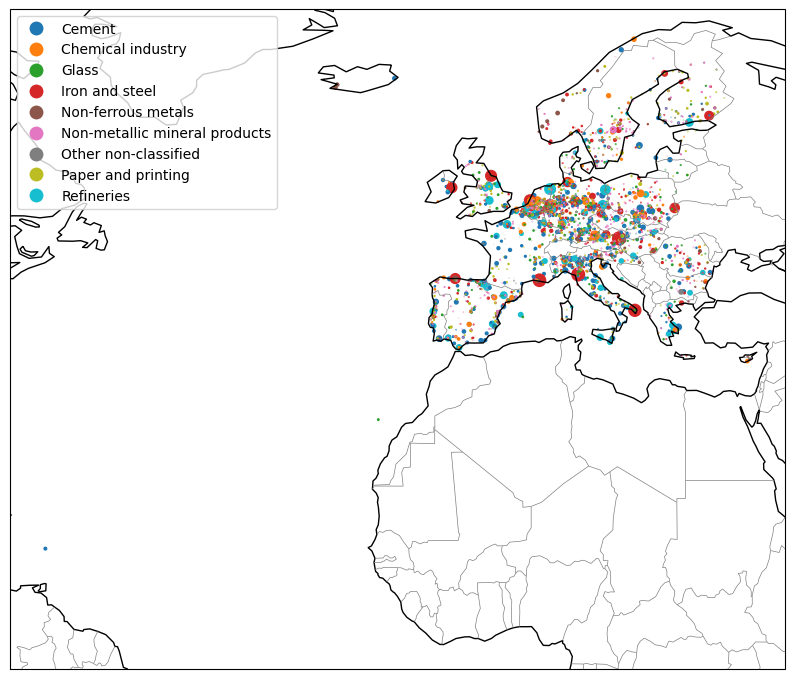

In [342]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
gdf.plot(ax=ax,column='Subsector',markersize=gdf.Emissions_ETS_2014/1e5, legend = True)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, color='grey', linewidth=0.5)

### e) Create a matplotlib bar chart outlining the ETS emissions per industry sector in units of MtCO2/year.

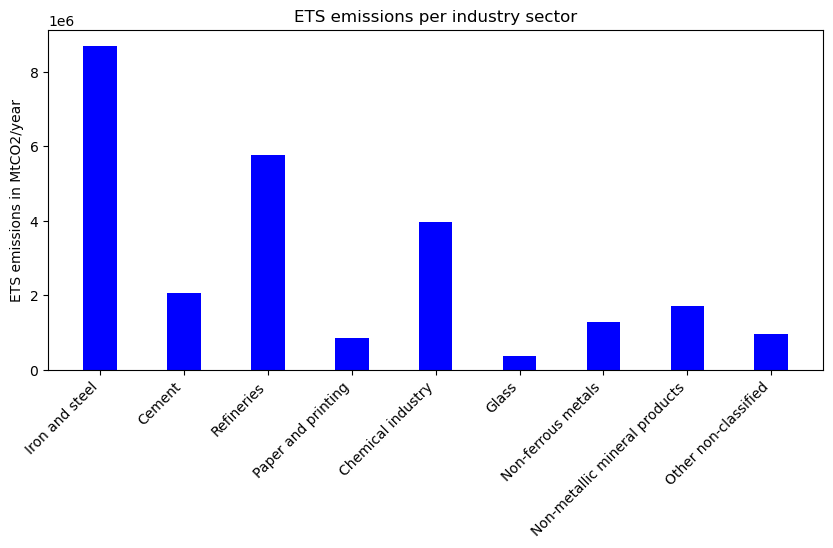

In [343]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes()


xdata = df3.Subsector
ydata = df3.Emissions_ETS_2014
# creating the bar plot
plt.bar(xdata,ydata , color ='blue',
        width = 0.4)
 
ax.set_ylabel('ETS emissions in MtCO2/year')
plt.title('ETS emissions per industry sector')
fig.autofmt_xdate(rotation=45)

#das stimmt doch irgendwie nicht, da ist zement nicht so hoch

### f) Identify the industry sector with the highest ETS emissions. What’s the share in percent of this sector relative to the total emissions accounted for?

In [344]:
max_ETS = df3.groupby('Subsector').Emissions_ETS_2014.sum().nlargest(1)
ETS_ges = df3.Emissions_ETS_2014.sum()
share_max = (max_ETS/ETS_ges)*100
print(max_ETS.index[0] ,' has the largest ETS emissions with ', round(share_max[0],2) , ' %.')

Cement  has the largest ETS emissions with  26.69  %.


### h) For each country, identify the sector with the highest level of ETS emissions. 

In [345]:
max_ETS_country = df3.groupby(['Country','Subsector']).Emissions_ETS_2014.sum()
df_h = max_ETS_country.unstack('Country').max()
df_h

Country
Austria           11893841.0
Belgium            6595319.0
Bulgaria           1737308.0
Croatia                  0.0
Cyprus             1506658.0
Czech Republic     3103995.0
Denmark            1718011.0
Estonia              54776.0
Finland            4533778.0
France            13840747.0
Germany           36173208.0
Greece             6557676.0
Hungary            1396850.0
Iceland            1384891.0
Ireland            2637900.0
Italy             19302518.0
Latvia              805238.0
Liechtenstein      2073385.0
Lithuania          1631285.0
Luxembourg          585892.0
Netherlands       10807589.0
Norway             2614865.0
Poland             9736901.0
Portugal           5277413.0
Romania            5097704.0
Slovakia           3160949.0
Slovenia            691831.0
Spain             16386004.0
Sweden             4090037.0
Switzerland              0.0
United Kingdom    20265336.0
dtype: float64

### i) List the 20 German companies responsible for the most ETS emissions and their respective emissions in MtCO2/year in descending order.

In [346]:
df_Ger = df3.loc[df3['Country'] == 'Germany']
df_Ger2 = df_Ger[:20].groupby(['CompanyName']).Emissions_ETS_2014.sum().sort_values(ascending = False)
print(df_Ger2)

CompanyName
ROGESA Roheisengesellschaft Saar mbH                      4223992.0
Werk 1 MIRO-Mineralölraffinerie Oberrhein GmbH & Co.KG    2782816.0
Schwenk Zement KG                                         1035593.0
HeidelbergCement AG                                        979187.0
ZKS Zentralkokerei Saar GmbH                               975238.0
AG der Dillinger Hüttenwerke                               746699.0
Holcim (Süddeutschland) GmbH                               700686.0
Lafarge Zement Wössingen GmbH                              483269.0
HeidelbergCement AG Zementwerk Leimen                      417889.0
Saarstahl AG                                               366062.0
SCA Hygiene Products GmbH Consumer Products                203327.0
Märker Zement GmbH                                         160329.0
Stora Enso Maxau GmbH                                      156073.0
Sasol Germany GmbH                                         149825.0
Papierfabrik Palm GmbH & Co.KG      

### i) Plot a choropleth map of NUTS-2 regions with matplotlib which shows each region’s industryETS emissions per area (in tCO2/year/km2). 

id
BG423      4457.589408
BG424      3193.078480
BG425      3226.444037
CH011      3228.299421
CH012      5214.645306
             ...      
LV        64650.672758
ME        13888.621929
MK        25403.567358
SK0       49008.115415
IT       301481.409249
Length: 2010, dtype: float64


<Axes: >

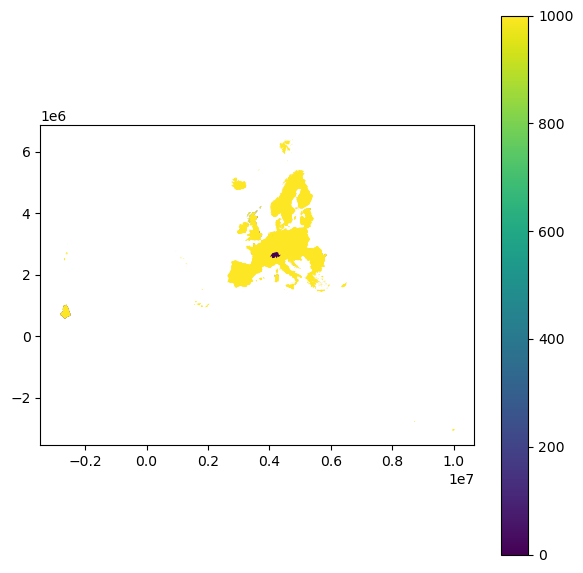

In [347]:
url = "https://tubcloud.tu-berlin.de/s/5WJ6pGsBKR7a3sp/download/NUTS_RG_10M_2021_4326.geojson"
nuts = gpd.read_file(url)
#nuts.head(3)
nuts = nuts.set_index('id')
nuts.explore()
nuts = nuts.to_crs(3035)
area = nuts.area / 1e6
gdf = gdf.to_crs(3035)
joined = gdf.sjoin(nuts)
print(area)

Emissions = gdf.Emissions_ETS_2014/1e6
gdf['ETS_per_area'] = Emissions/gdf.area

emi = (joined.groupby("NUTS_ID").Emissions_ETS_2014.sum()*1e6)/area # t/year/km²
emi = emi.reindex(nuts.index)

#plot figure
nuts.plot(figsize=(7,7), column=emi, legend=True,  vmax=1000)
#ich glaube die area passt noch nicht zu dem anderen, ist auch nicht nach nuts id sortiert. 

### j) Which NUTS-3 region has the highest level of industry ETS emissions? In addition to the “NUTS_ID”, also provide the common name of the region. Which companies are settled there and which sectors do they belong to?

In [348]:
Nuts3 = joined.loc[joined['LEVL_CODE'] == 3]
Nuts3 = joined.groupby('CNTR_CODE').Emissions_ETS_2014.sum().sort_values(ascending = False)

print(Nuts3[:1].index, ' has the highest ETS emissions with ', Nuts3[:1][0], 'Mt/year.')

#hier muss man noch den common name finden und die companies plus sectors

Index(['DE'], dtype='object', name='CNTR_CODE')  has the highest ETS emissions with  477553180.0 Mt/year.


### Aufgabe 4: Hydropower in the World

### a) Read the provided CSV file with pandas and convert it into a geopandas.GeoDataFrame.

In [349]:
url = "https://tubcloud.tu-berlin.de/s/aZZfWGd8rmbEx39/download/global_power_plant_database.csv"
df4 = pd.read_csv(url, index_col = 'gppd_idnr', sep = ",",low_memory=False)
df4

KeyboardInterrupt: 

In [ ]:
import geopandas as gpd
import cartopy

#set geometry data
geometry = gpd.points_from_xy(df4['longitude'], df4['latitude'])
#convert to geopandas dataframe
hydro_gdf = gpd.GeoDataFrame(df4, geometry=geometry, crs=4326)
hydro_gdf

### b) Reduce the dataset such that it only includes hydropower plants. 

In [ ]:
hydroonly_gdf = hydro_gdf[hydro_gdf['primary_fuel']== 'Hydro']
hydroonly_gdf.tail()

### c)  Identify the oldest hydropower plant in the dataset by its name

In [ ]:
index_oldest = hydroonly_gdf.commissioning_year.nlargest(1).index.values[0]
name_oldest = hydroonly_gdf.loc[index_oldest]['name']
name_oldest
#hydroonly_gdf.comissioning_year.largest()

### d) Determine the percentage share of hydropower plants with capacities below 10 MW and below 100 MW by the number of hydropower plants

In [ ]:
hydro_10 = hydroonly_gdf[hydroonly_gdf['capacity_mw']< 10]
hydro_100 = hydroonly_gdf[hydroonly_gdf['capacity_mw']< 100]
h10= len(hydro_10)
h100 = len(hydro_100)
hges= len(hydroonly_gdf)

share_10 = (h10/hges)*100
share_100= (h100/hges)*100

print('The share of power plants with a capacity below 10 MW is ', round(share_10,2), ' % and the share of power plants with a capacity below 100 MW is ', round(share_100, 2),' %.')

### e) Identify the three countries with the largest total hydropower capacities and list their summed capacities in units of GW.


In [ ]:
#1. largest capacity
cap = hydroonly_gdf.groupby('country').capacity_mw.sum().nlargest(3)
#convert to GW:
cap_GW = cap/1000
print(cap_GW, ', three countries with the largest total hydropower capacities, summed an displayed in GW.')

### f) Identify the five hydropower plants with the highest capacity factor based on the estimated generation in 2017.

In [ ]:
gen_2017 = hydroonly_gdf['generation_gwh_2017']
est_gen_2017 = hydroonly_gdf['estimated_generation_gwh_2017']
cap_fac= (gen_2017/est_gen_2017)

hydroonly_gdf['capacity_factor'] = cap_fac
hydroonly_gdf.capacity_factor.nlargest(5)

### g) Create a global map with all hydropower plants. The marker size should be proportional to the nominal capacity (appropriately scaled) and coloured according to the estimated 2017 capacity factor. Add coastlines and country borders for orientation. Include labels for the colouring and marker sizes.

In [ ]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(9,9))

ax = plt.axes(projection=ccrs.PlateCarree())

hydroonly_gdf.plot(
    ax=ax,
    column='capacity_mw',
    markersize=hydroonly_gdf.capacity_mw/1e3,
    legend=True
)
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linewidth=0.5)
ax.annotate('markersize proportional to capacity ',xy=(1, 2), xytext=(0,-0.5), textcoords='axes fraction',)

# wäre nice legende noch zu schrumpfen und die farben müsste man noch anpassen

### h) Remove all hydropower plants with a missing commissioning year from the dataset. Compute the capacity-weighted mean age of all remaining hydropower plants.

In [ ]:
indizes_neu= hydroonly_gdf.commissioning_year.dropna().index
hydro_com = hydroonly_gdf.loc[indizes_neu]
hydro_com
year = hydroonly_gdf['commissioning_year']
age = 2023- year
cap= hydroonly_gdf['capacity_mw']
hydroonly_gdf['cap_age'] = cap*age
cape_age_sum = hydroonly_gdf.cap_age.sum()
sum_cap = hydroonly_gdf.capacity_mw.sum()
mean_age = cape_age_sum/sum_cap
print('The capacity-weighted mean age of all remaining hydropower plants is ', round(mean_age,2), ' years.')

### i) For each country, compute the average age of its hydropower plants weighted by the plants’ average estimated generation between 2014 and 2017. Hint: You can iterate over GroupBy objectswith a loop. Which five countries have the oldest and newest fleet of hydropower plants?

In [ ]:
est_gen_14_17 = (hydroonly_gdf['estimated_generation_gwh_2014']+ hydroonly_gdf['estimated_generation_gwh_2015']+hydroonly_gdf['estimated_generation_gwh_2016']+hydroonly_gdf['estimated_generation_gwh_2017'])/4
hydroonly_gdf['est_gen_14_17']=est_gen_14_17
age_gen = age*est_gen_14_17
hydroonly_gdf['age_gen'] = age_gen

sum_age_gen = hydroonly_gdf.groupby('country').sum('age_gen').age_gen

sum_est_gen_14_17 = hydroonly_gdf.groupby('country').sum('est_gen_14_17').est_gen_14_17
mean_country = sum_age_gen/sum_est_gen_14_17

print('This 5 countries have the oldest fleet: ' ,mean_country.sort_values().dropna().tail(5))
print('This 5 countries have the newst fleet: ' ,mean_country.sort_values().dropna().head(5))

#die Nullen müssten eigentlich noch rausgefiltert werden.

In [ ]:
hydroonly_gdf['mean_country'] = mean_country
mean_country = hydroonly_gdf[hydroonly_gdf['mean_country']>0]